In [1]:
# Install required packages.
import os

#!pip install torch==1.7.0
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)


!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install git+https://github.com/rusty1s/pytorch_geometric.git

2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 13.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/rusty1s/pytorch_geometric.git to /tmp/pip-req-build-1clnn06g
  Running command git clone --filter=blob:none --quiet https://github.com/rusty1s/pytorch_geometric.git /tmp/pip-req-build-1clnn06g
  Resolved https://github.com/rusty1s/pytorch_geometric.git to commit ca5311c2d1cf3d384916c47c112b69dcd7703f24
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [17]:
import argparse
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from math import sqrt
import math
from statistics import mean

from torch_geometric.datasets import TUDataset

import torch as th
import torch
import torch.nn as nn
from torch import Tensor
from torch.nn.parameter import Parameter
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.nn import Linear, LayerNorm
from sklearn import metrics
from scipy.spatial.distance import hamming
import statistics
import pandas
from time import perf_counter
from IPython.core.display import deepcopy
from torch_geometric.nn import MessagePassing
import copy
from torch.nn import ReLU, Sequential
from torch import sigmoid
from itertools import chain
from time import perf_counter
from torch_geometric.data import Data, Batch, Dataset
from functools import partial
from torch_geometric.utils import to_networkx
from torch_geometric.utils import remove_self_loops
from typing import Callable, Union, Optional
#from torch_geometric.utils.num_nodes import maybe_num_nodes
import networkx as nx
from typing import List, Tuple, Dict
from collections import Counter
import statistics
import csv


from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader
import torch_geometric.nn as gnn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = TUDataset(root='data/TUDataset', name='MUTAG')

Extracting data/TUDataset/MUTAG/MUTAG.zip
Processing...
Done!


In [5]:
Explainability_name = 'SubGraphX'
Task_name = 'Graph Classification'
Model_Name = "GCN_plus_GAP"
checkpoint_directory_Classifier = "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/model_classifier.pt"
classifier_lr = 0.001
classifier_dropout = 0.1
classifier_weight_decay = 1e-6
classifier_bias = True
Model_name = "GCN_plus_GAP"
DataSet_name = "MUTAG"

File_Name = Model_name + " " + Explainability_name + " " + Task_name + " " + DataSet_name + " "

In [6]:
#train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=0, shuffle=True)
#print("Number of Training Graphs: ", len(train_dataset))
#print("Number of Test Graphs: ", len(test_dataset))

df = pandas.read_csv("/content/drive/My Drive/Explainability Methods/Train and Test Indexes on Graph Classification/Experimental Results/train_test_indexes.csv")

read_training_list_indexes__ = df['Train Indexes']
read_test_list_indexes__ = df['Test Indexes']
read_test_list_indexes__ = read_test_list_indexes__.dropna()
read_test_list_indexes = []
read_training_list_indexes = []
for element in read_test_list_indexes__:
    read_test_list_indexes.append(int(element))
for element in read_training_list_indexes__:
    read_training_list_indexes.append(int(element))


print(read_training_list_indexes)
print(read_test_list_indexes)

train_dataset = []
test_dataset = []
for index in read_training_list_indexes:
    train_dataset.append(dataset[index])
for index in read_test_list_indexes:
    test_dataset.append(dataset[index])


print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

[51, 142, 143, 10, 4, 141, 125, 23, 3, 79, 28, 117, 136, 156, 83, 128, 109, 70, 31, 58, 7, 148, 14, 187, 20, 162, 123, 13, 91, 185, 169, 102, 32, 55, 119, 25, 161, 175, 52, 121, 152, 108, 113, 65, 39, 103, 131, 42, 166, 110, 160, 68, 90, 89, 64, 172, 159, 72, 170, 18, 122, 29, 179, 49, 171, 178, 9, 74, 96, 48, 181, 127, 126, 87, 12, 163, 88, 53, 94, 146, 5, 158, 16, 67, 6, 59, 164, 151, 34, 47, 54, 46, 100, 112, 93, 182, 66, 106, 124, 19, 186, 133, 45, 15, 40, 167, 174, 98, 105, 153, 61, 63, 132, 116, 43, 80, 33, 147, 165, 69, 135, 86, 76, 57, 173, 115, 138, 140, 134, 180, 95, 22, 38, 41, 24, 120, 145, 26, 21, 50, 176, 107, 78, 17, 85, 154, 60, 92, 184, 129]
[0, 1, 2, 8, 11, 27, 30, 35, 36, 37, 44, 56, 62, 71, 73, 75, 77, 81, 82, 84, 97, 99, 101, 104, 111, 114, 118, 130, 137, 139, 144, 149, 150, 155, 157, 168, 177, 183]
Number of training graphs: 150
Number of test graphs: 38


In [7]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [9]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Models/Script/'
sys.path.insert(0,py_path)
import GCN_plus_GAP as Graph_Network
GNN_Model = Graph_Network.GCN_plus_GAP(model_name='GCN_plus_GAP', model_level='graph', input_dim=7, hidden_dim=7, output_dim=2,
                                       num_hid_layers=2, Bias=classifier_bias, act_fun='ReLu', Weight_Initializer=1, dropout_rate=classifier_dropout)
#import DGCNN as dgcnn_model
#GNN_Model = dgcnn_model.DGCNN_Model(GNN_layers=[32, 32, 32, 7], num_classes=2, mlp_act_fun='ReLu', dgcnn_act_fun='tanh', mlp_dropout_rate=0.5, Weight_Initializer=3, Bias=False, dgcnn_k=20, node_feat_size=7, hid_channels=[16,32], conv1d_kernels=[2,5], ffn_layer_size=128, strides=[2,1])

GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
ReLu is Selected.


In [10]:
GNN_Model_Optimizer = torch.optim.Adam(GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_weight_decay)

In [11]:
criterion = torch.nn.CrossEntropyLoss()
def loss_calculations(preds, gtruth):
    loss_per_epoch = criterion(preds, gtruth)
    return loss_per_epoch

In [12]:
def visualize_losses(GNN_Model_losses, epoch_history):
    GNN_Model_losses_list = torch.stack(GNN_Model_losses).cpu().detach().numpy()

    fig = plt.figure(figsize=(27,20))

    ax = plt.subplot2grid((3, 1), (0, 0), colspan=1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(" Loss in Epoch: " + str(epoch_history))

    ax.plot(GNN_Model_losses_list, color='r')

    plt.savefig('/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/' + File_Name + 'Loss_til_epoch_{:04d}.png'.format(epoch_history))
    plt.show()


In [13]:
def train_step():
    GNN_Model_loss_batch = []
    Pred_Labels = []
    Real_Labels = []

    GNN_Model.train()
    GNN_Model.zero_grad()
    for batch_of_graphs in train_dataloader:
        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
        batch_loss = loss_calculations(soft, batch_of_graphs.y)
        #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch_of_graphs)
        #batch_loss = loss_calculations(softmaxed_h2, batch_of_graphs.y)
        #print('passed')
        Pred_Labels.extend(soft.argmax(dim=1).detach().tolist())
        Real_Labels.extend(batch_of_graphs.y.detach().tolist())
        GNN_Model_loss_batch.append(batch_loss)

        batch_loss.backward()
        GNN_Model_Optimizer.step()

    return torch.mean(torch.tensor(GNN_Model_loss_batch)), metrics.accuracy_score(Real_Labels, Pred_Labels)

In [14]:
GNN_Model_training_Acc_per_epoch = []
GNN_Model_training_time_per_epoch = []
def train(EPOCHS, load_index):
    GNN_Model_training_loss_per_epoch = []

    for epoch in range(EPOCHS):
        t1 = perf_counter()
        GNN_Model_training_loss, training_acc = train_step()
        GNN_Model_training_time_per_epoch.append(perf_counter()-t1)
        print(f'Epoch: {epoch+1:03d}, Model Loss: {GNN_Model_training_loss:.4f}')

        GNN_Model_training_loss_per_epoch.append(GNN_Model_training_loss)
        GNN_Model_training_Acc_per_epoch.append(training_acc)
        #break

        if (epoch + load_index + 1) % 50 == 0 and epoch > 0:
            visualize_losses(GNN_Model_training_loss_per_epoch, epoch + load_index + 1)
        if (epoch + load_index + 1) % 100 == 0 and epoch > 0:
            torch.save({'epoch': epoch+load_index+1, 'model_state_dict': GNN_Model.state_dict(), 'optimizer_state_dict': GNN_Model_Optimizer.state_dict(), 'loss': GNN_Model_training_loss_per_epoch,}, "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(epoch + load_index + 1)+".pt")



Epoch: 001, Model Loss: 0.6950
Epoch: 002, Model Loss: 0.6926
Epoch: 003, Model Loss: 0.6910
Epoch: 004, Model Loss: 0.6892
Epoch: 005, Model Loss: 0.6880
Epoch: 006, Model Loss: 0.6847
Epoch: 007, Model Loss: 0.6828
Epoch: 008, Model Loss: 0.6819
Epoch: 009, Model Loss: 0.6799
Epoch: 010, Model Loss: 0.6774
Epoch: 011, Model Loss: 0.6767
Epoch: 012, Model Loss: 0.6749
Epoch: 013, Model Loss: 0.6738
Epoch: 014, Model Loss: 0.6727
Epoch: 015, Model Loss: 0.6719
Epoch: 016, Model Loss: 0.6696
Epoch: 017, Model Loss: 0.6688
Epoch: 018, Model Loss: 0.6689
Epoch: 019, Model Loss: 0.6678
Epoch: 020, Model Loss: 0.6657
Epoch: 021, Model Loss: 0.6642
Epoch: 022, Model Loss: 0.6633
Epoch: 023, Model Loss: 0.6619
Epoch: 024, Model Loss: 0.6600
Epoch: 025, Model Loss: 0.6586
Epoch: 026, Model Loss: 0.6577
Epoch: 027, Model Loss: 0.6577
Epoch: 028, Model Loss: 0.6555
Epoch: 029, Model Loss: 0.6531
Epoch: 030, Model Loss: 0.6530
Epoch: 031, Model Loss: 0.6501
Epoch: 032, Model Loss: 0.6480
Epoch: 0

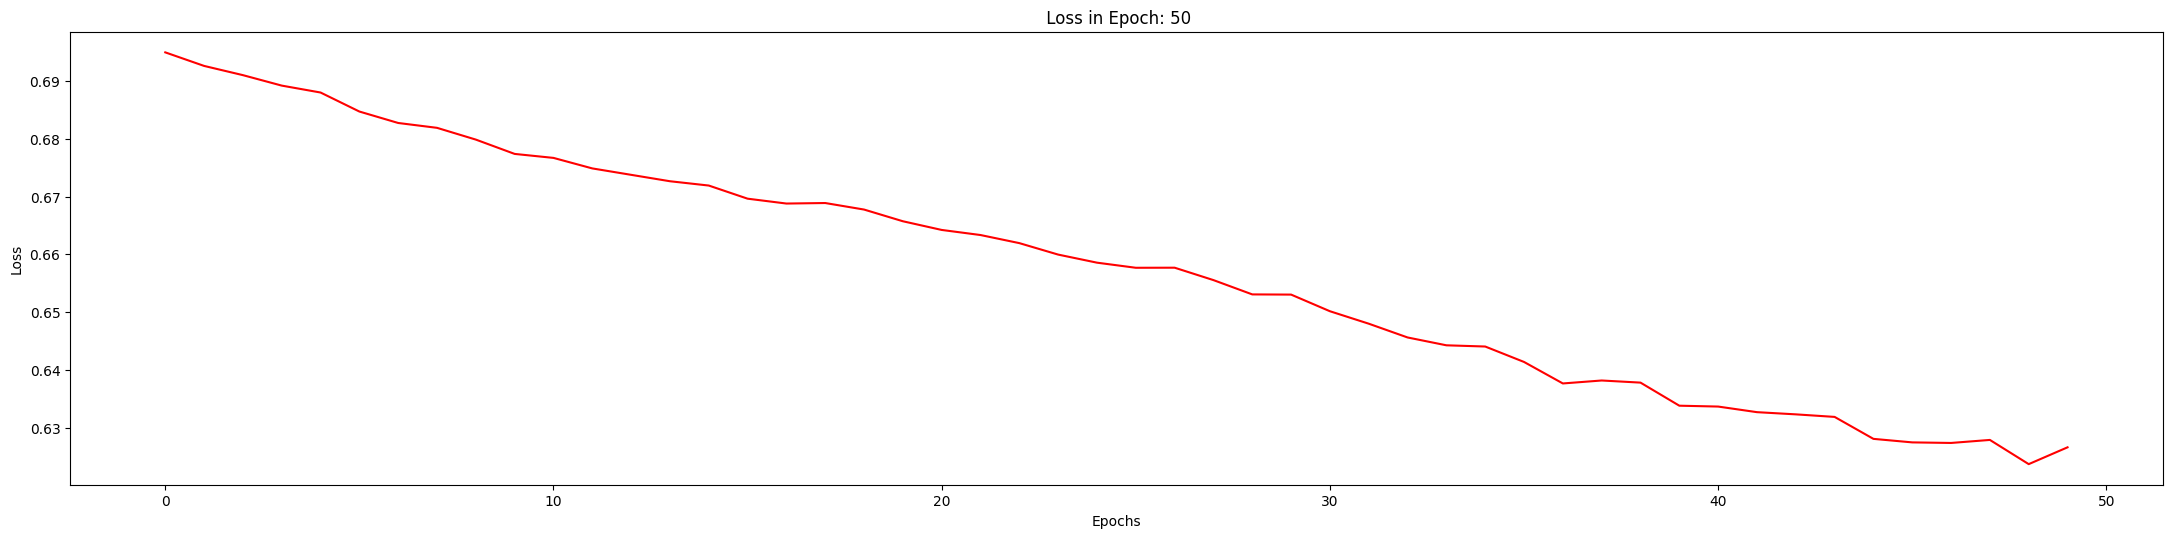

Epoch: 051, Model Loss: 0.6244
Epoch: 052, Model Loss: 0.6234
Epoch: 053, Model Loss: 0.6219
Epoch: 054, Model Loss: 0.6223
Epoch: 055, Model Loss: 0.6231
Epoch: 056, Model Loss: 0.6216
Epoch: 057, Model Loss: 0.6202
Epoch: 058, Model Loss: 0.6207
Epoch: 059, Model Loss: 0.6200
Epoch: 060, Model Loss: 0.6181
Epoch: 061, Model Loss: 0.6194
Epoch: 062, Model Loss: 0.6174
Epoch: 063, Model Loss: 0.6202
Epoch: 064, Model Loss: 0.6187
Epoch: 065, Model Loss: 0.6192
Epoch: 066, Model Loss: 0.6174
Epoch: 067, Model Loss: 0.6166
Epoch: 068, Model Loss: 0.6164
Epoch: 069, Model Loss: 0.6178
Epoch: 070, Model Loss: 0.6175
Epoch: 071, Model Loss: 0.6151
Epoch: 072, Model Loss: 0.6137
Epoch: 073, Model Loss: 0.6158
Epoch: 074, Model Loss: 0.6165
Epoch: 075, Model Loss: 0.6163
Epoch: 076, Model Loss: 0.6161
Epoch: 077, Model Loss: 0.6155
Epoch: 078, Model Loss: 0.6139
Epoch: 079, Model Loss: 0.6128
Epoch: 080, Model Loss: 0.6124
Epoch: 081, Model Loss: 0.6159
Epoch: 082, Model Loss: 0.6141
Epoch: 0

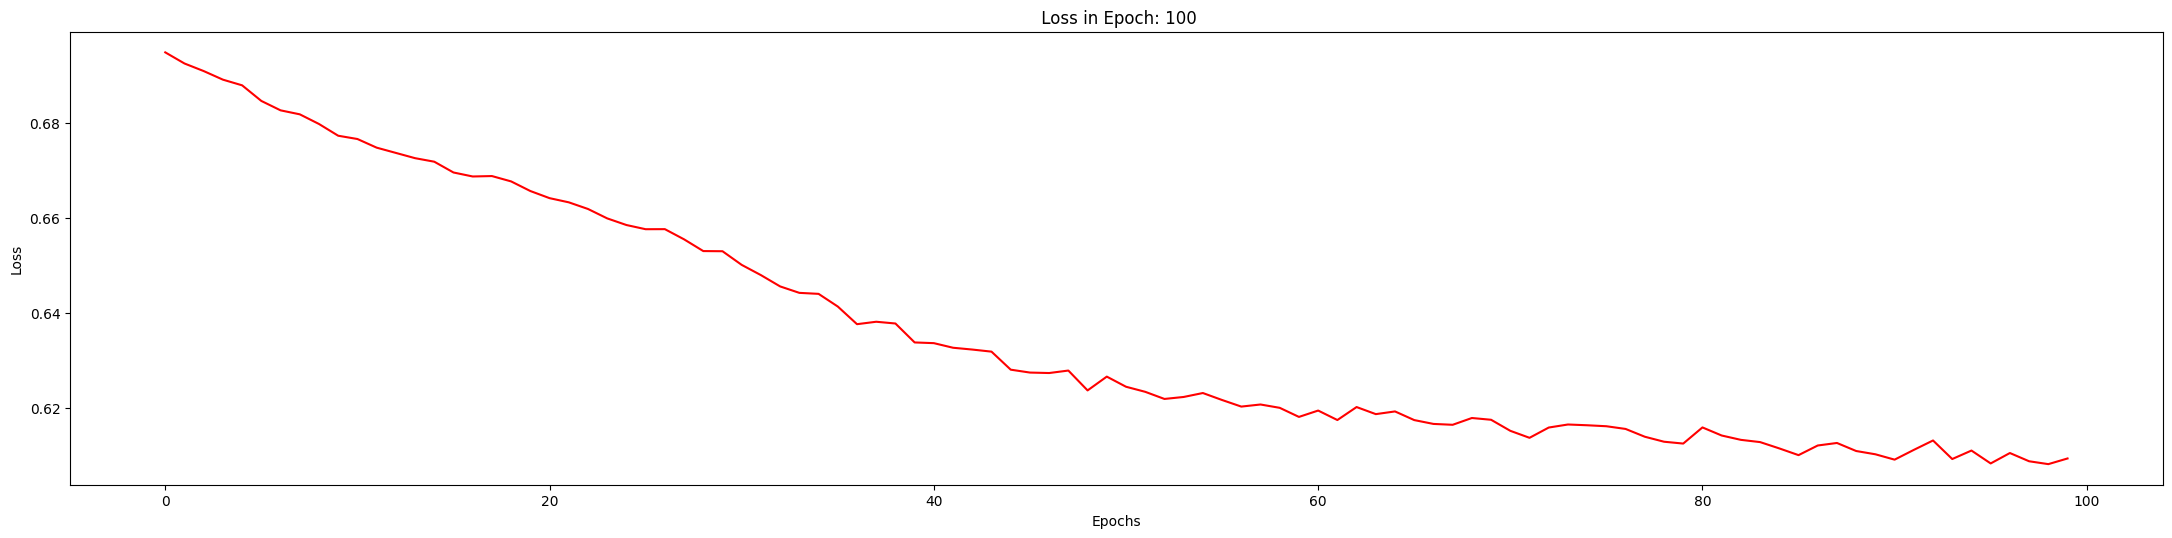

Epoch: 101, Model Loss: 0.6072
Epoch: 102, Model Loss: 0.6075
Epoch: 103, Model Loss: 0.6076
Epoch: 104, Model Loss: 0.6100
Epoch: 105, Model Loss: 0.6056
Epoch: 106, Model Loss: 0.6036
Epoch: 107, Model Loss: 0.6055
Epoch: 108, Model Loss: 0.6038
Epoch: 109, Model Loss: 0.6025
Epoch: 110, Model Loss: 0.6045
Epoch: 111, Model Loss: 0.6018
Epoch: 112, Model Loss: 0.6026
Epoch: 113, Model Loss: 0.6032
Epoch: 114, Model Loss: 0.6021
Epoch: 115, Model Loss: 0.5976
Epoch: 116, Model Loss: 0.5967
Epoch: 117, Model Loss: 0.5986
Epoch: 118, Model Loss: 0.5979
Epoch: 119, Model Loss: 0.5993
Epoch: 120, Model Loss: 0.6003
Epoch: 121, Model Loss: 0.5984
Epoch: 122, Model Loss: 0.5956
Epoch: 123, Model Loss: 0.5988
Epoch: 124, Model Loss: 0.5962
Epoch: 125, Model Loss: 0.5943
Epoch: 126, Model Loss: 0.5978
Epoch: 127, Model Loss: 0.5963
Epoch: 128, Model Loss: 0.5957
Epoch: 129, Model Loss: 0.5928
Epoch: 130, Model Loss: 0.5932
Epoch: 131, Model Loss: 0.5918
Epoch: 132, Model Loss: 0.5937
Epoch: 1

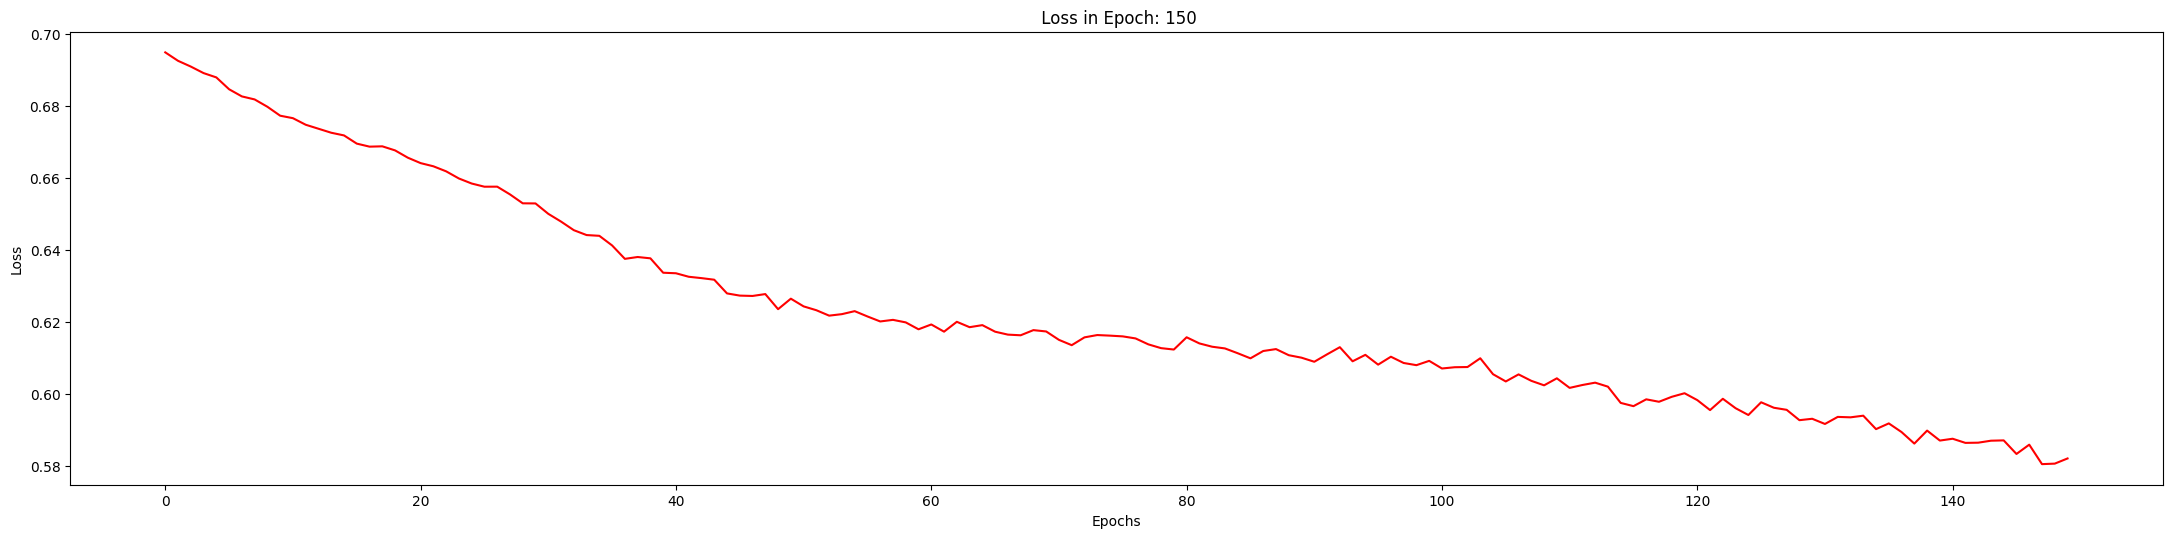

Epoch: 151, Model Loss: 0.5776
Epoch: 152, Model Loss: 0.5802
Epoch: 153, Model Loss: 0.5798
Epoch: 154, Model Loss: 0.5769
Epoch: 155, Model Loss: 0.5800
Epoch: 156, Model Loss: 0.5791
Epoch: 157, Model Loss: 0.5772
Epoch: 158, Model Loss: 0.5742
Epoch: 159, Model Loss: 0.5732
Epoch: 160, Model Loss: 0.5786
Epoch: 161, Model Loss: 0.5740
Epoch: 162, Model Loss: 0.5701
Epoch: 163, Model Loss: 0.5736
Epoch: 164, Model Loss: 0.5711
Epoch: 165, Model Loss: 0.5734
Epoch: 166, Model Loss: 0.5718
Epoch: 167, Model Loss: 0.5694
Epoch: 168, Model Loss: 0.5702
Epoch: 169, Model Loss: 0.5716
Epoch: 170, Model Loss: 0.5670
Epoch: 171, Model Loss: 0.5658
Epoch: 172, Model Loss: 0.5676
Epoch: 173, Model Loss: 0.5695
Epoch: 174, Model Loss: 0.5641
Epoch: 175, Model Loss: 0.5650
Epoch: 176, Model Loss: 0.5634
Epoch: 177, Model Loss: 0.5712
Epoch: 178, Model Loss: 0.5659
Epoch: 179, Model Loss: 0.5615
Epoch: 180, Model Loss: 0.5646
Epoch: 181, Model Loss: 0.5542
Epoch: 182, Model Loss: 0.5582
Epoch: 1

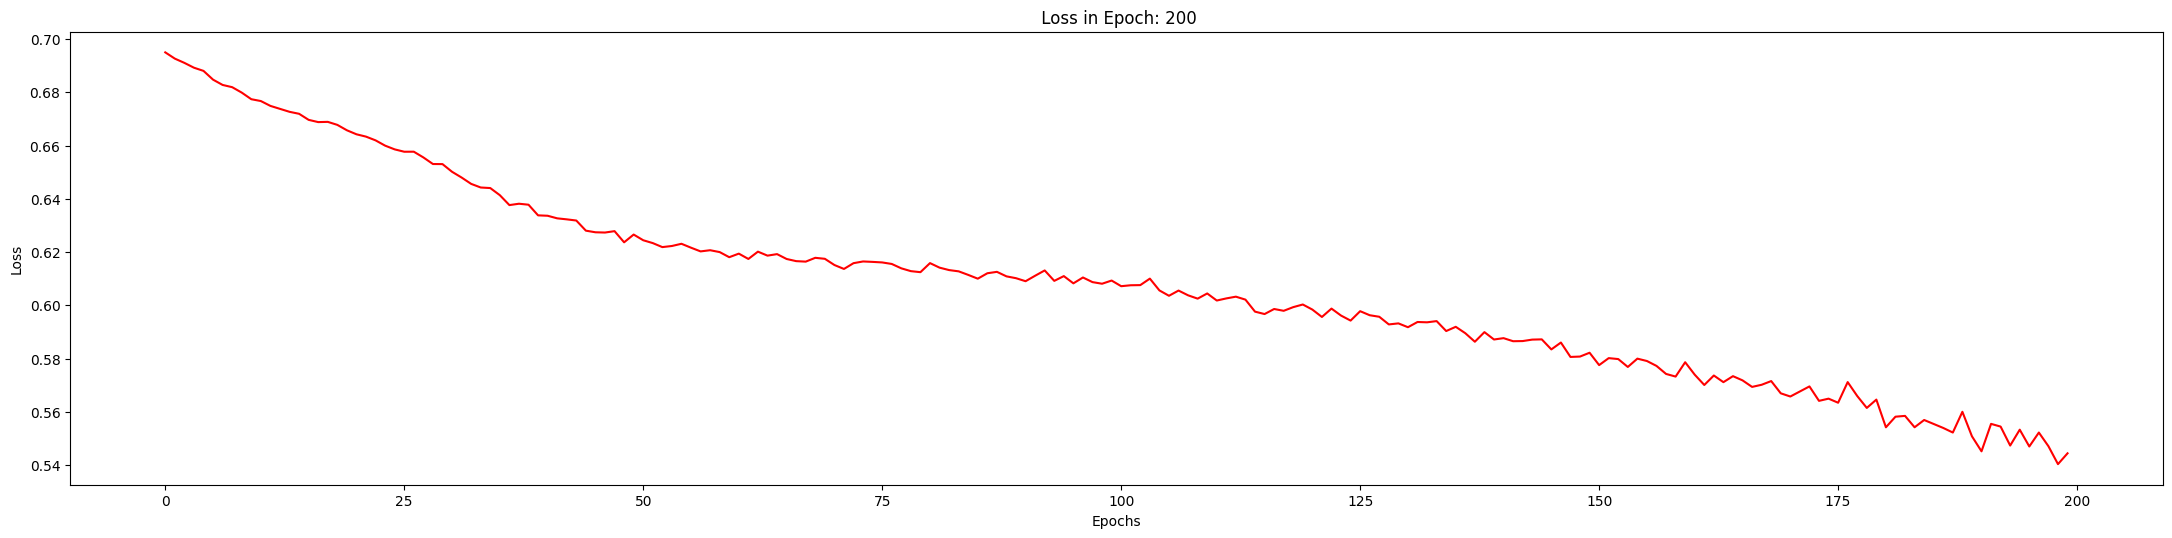

Epoch: 201, Model Loss: 0.5455
Epoch: 202, Model Loss: 0.5408
Epoch: 203, Model Loss: 0.5369
Epoch: 204, Model Loss: 0.5459
Epoch: 205, Model Loss: 0.5442
Epoch: 206, Model Loss: 0.5395
Epoch: 207, Model Loss: 0.5386
Epoch: 208, Model Loss: 0.5357
Epoch: 209, Model Loss: 0.5350
Epoch: 210, Model Loss: 0.5447
Epoch: 211, Model Loss: 0.5321
Epoch: 212, Model Loss: 0.5339
Epoch: 213, Model Loss: 0.5396
Epoch: 214, Model Loss: 0.5366
Epoch: 215, Model Loss: 0.5382
Epoch: 216, Model Loss: 0.5399
Epoch: 217, Model Loss: 0.5422
Epoch: 218, Model Loss: 0.5323
Epoch: 219, Model Loss: 0.5305
Epoch: 220, Model Loss: 0.5334
Epoch: 221, Model Loss: 0.5371
Epoch: 222, Model Loss: 0.5295
Epoch: 223, Model Loss: 0.5357
Epoch: 224, Model Loss: 0.5342
Epoch: 225, Model Loss: 0.5288
Epoch: 226, Model Loss: 0.5331
Epoch: 227, Model Loss: 0.5300
Epoch: 228, Model Loss: 0.5210
Epoch: 229, Model Loss: 0.5230
Epoch: 230, Model Loss: 0.5279
Epoch: 231, Model Loss: 0.5295
Epoch: 232, Model Loss: 0.5227
Epoch: 2

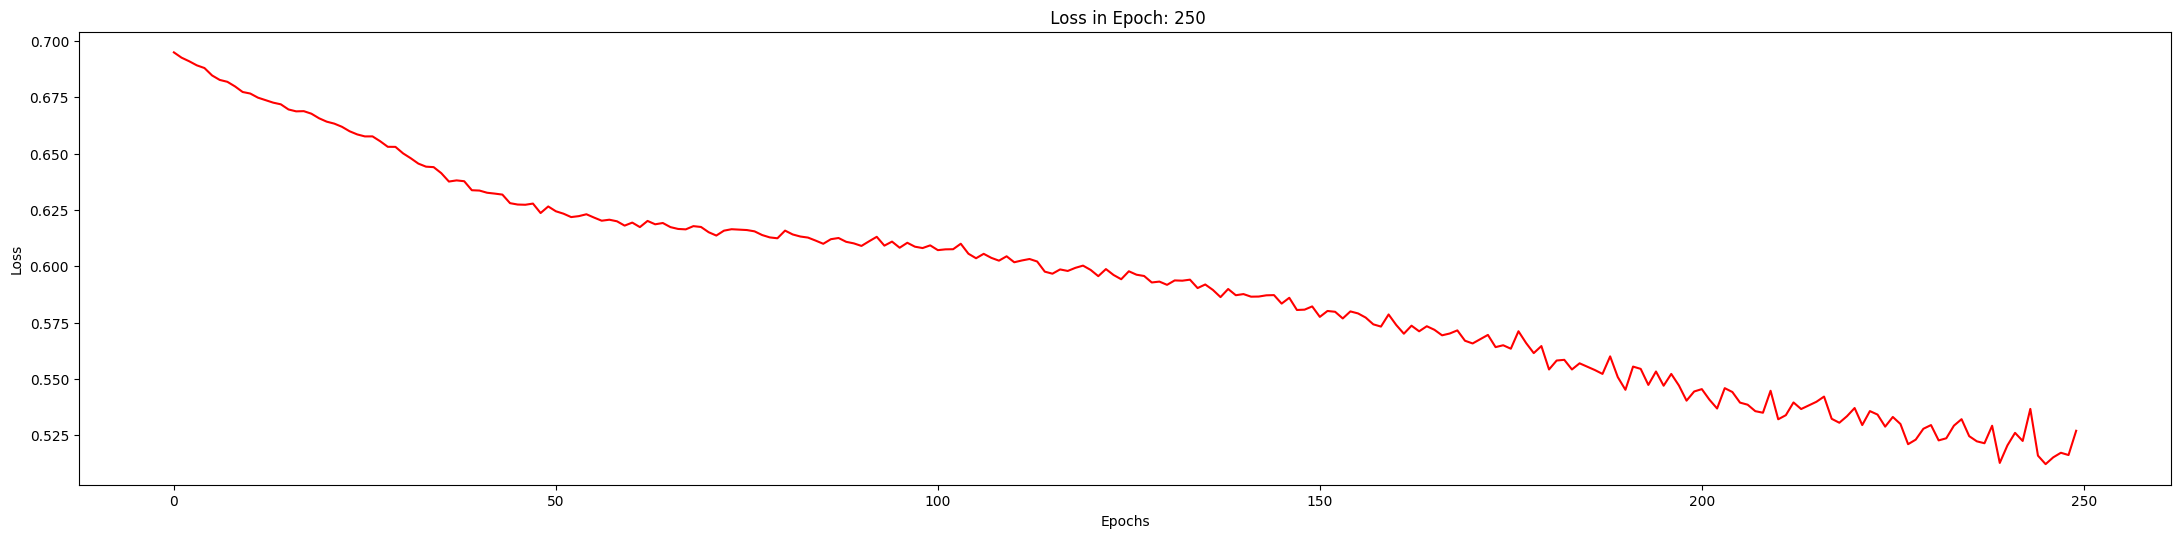

Epoch: 251, Model Loss: 0.5267
Epoch: 252, Model Loss: 0.5144
Epoch: 253, Model Loss: 0.5263
Epoch: 254, Model Loss: 0.5165
Epoch: 255, Model Loss: 0.5190
Epoch: 256, Model Loss: 0.5241
Epoch: 257, Model Loss: 0.5210
Epoch: 258, Model Loss: 0.5259
Epoch: 259, Model Loss: 0.5219
Epoch: 260, Model Loss: 0.5146
Epoch: 261, Model Loss: 0.5209
Epoch: 262, Model Loss: 0.5101
Epoch: 263, Model Loss: 0.5175
Epoch: 264, Model Loss: 0.5134
Epoch: 265, Model Loss: 0.5163
Epoch: 266, Model Loss: 0.5061
Epoch: 267, Model Loss: 0.5286
Epoch: 268, Model Loss: 0.5081
Epoch: 269, Model Loss: 0.5293
Epoch: 270, Model Loss: 0.5188
Epoch: 271, Model Loss: 0.5197
Epoch: 272, Model Loss: 0.5128
Epoch: 273, Model Loss: 0.5121
Epoch: 274, Model Loss: 0.5083
Epoch: 275, Model Loss: 0.5217
Epoch: 276, Model Loss: 0.5208
Epoch: 277, Model Loss: 0.5070
Epoch: 278, Model Loss: 0.5161
Epoch: 279, Model Loss: 0.5104
Epoch: 280, Model Loss: 0.5218
Epoch: 281, Model Loss: 0.5125
Epoch: 282, Model Loss: 0.5109
Epoch: 2

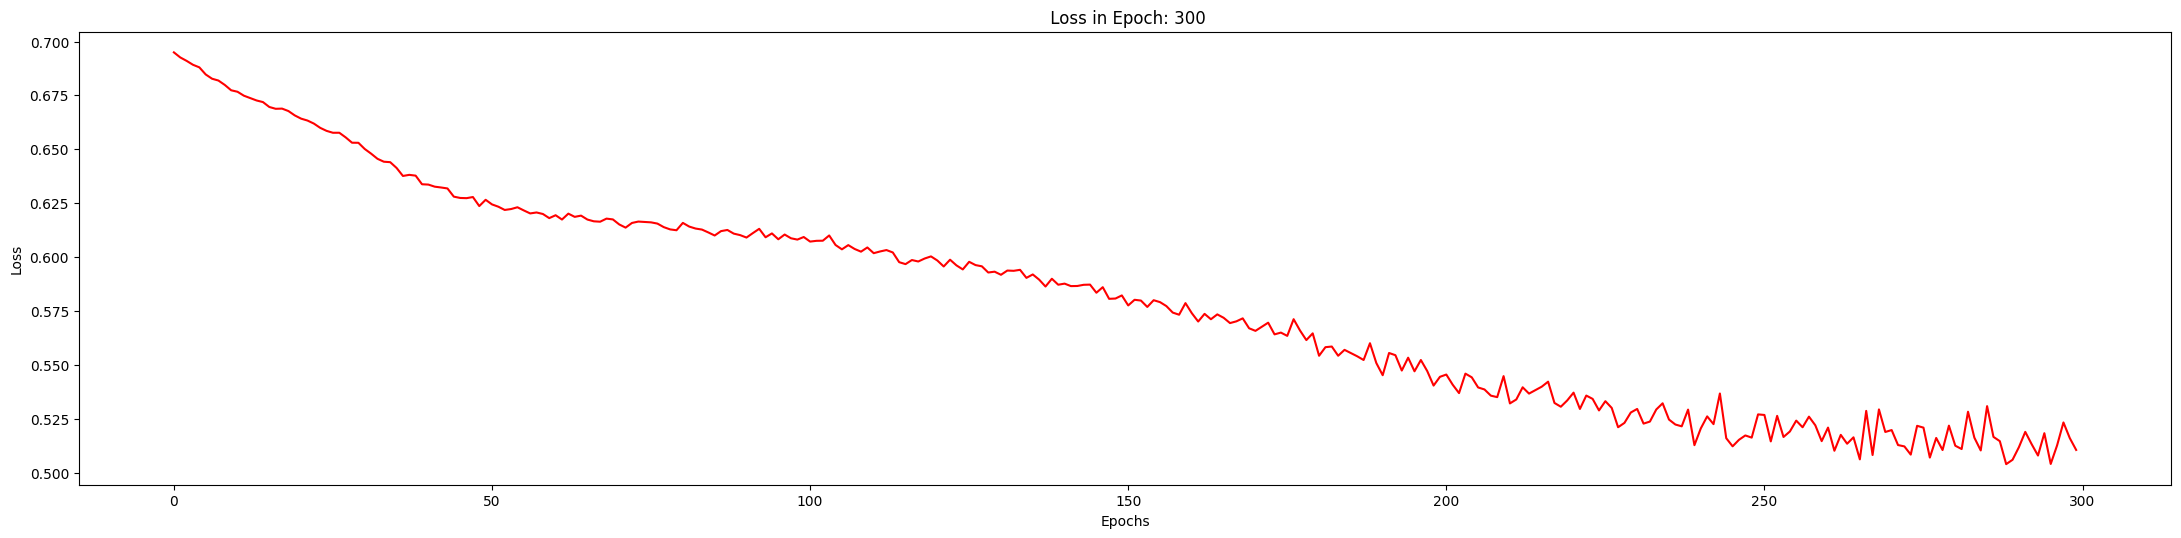

In [15]:
EPOCHS = 300
load_index = 0

train(EPOCHS, load_index)

In [ ]:
GNN_Model_test_predicted_labels = []
def GNN_Model_test(test_loader):
    GNN_Model.eval()
    correct = 0
    for batch_of_graphs in test_loader:
        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
        GNN_Model_test_pred = soft.argmax(dim=1).tolist()[0]
        #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch_of_graphs)
        #GNN_Model_test_pred = softmaxed_h2.argmax(dim=1)
        GNN_Model_test_predicted_labels.append(GNN_Model_test_pred)
        correct += int((GNN_Model_test_pred == batch_of_graphs.y).sum())
    return correct / len(test_loader.dataset), GNN_Model_test_predicted_labels

In [ ]:
GNN_Model_test_acc, predicted_labels = GNN_Model_test(test_dataloader)
print(f'Test Accuracy: {GNN_Model_test_acc:.4f}')

Test Accuracy: 0.6053


In [ ]:
def instance_time(test_dataset):
    instance_based_time = []
    GNN_Model.eval()
    correct = 0
    for batched_data in test_dataset:
        start_generation = perf_counter()
        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batched_data)
        CAM_test_pred = soft.argmax(dim=1)
        consumed_time = perf_counter() - start_generation
        instance_based_time.append(consumed_time)
    return instance_based_time

In [ ]:
samples_time = instance_time(test_dataset)
print(f'Test Instance based Time: {samples_time}')

Test Instance based Time: [0.0023549930000115182, 0.0012184740000122929, 0.002379422999979397, 0.0016736460000004172, 0.001684391999987156, 0.0022228159999997388, 0.0011311609999893335, 0.0012238219999858302, 0.0011058830000081343, 0.0011566070000128548, 0.0010709899999881145, 0.001047766999988653, 0.0010422850000111339, 0.0010980539999820849, 0.0010653380000178458, 0.0010948999999982334, 0.0010747599999945123, 0.0010963720000063404, 0.0010929859999748714, 0.0011160540000219044, 0.0011902770000062901, 0.0010862750000057986, 0.001153528999992659, 0.0011258840000039072, 0.0012189229999819418, 0.0010429990000204725, 0.0010808389999965584, 0.001072221000015361, 0.0010898240000187798, 0.0010849699999937457, 0.0010661590000040633, 0.001065686000004007, 0.001047055000015007, 0.0010233110000115175, 0.0011931989999993675, 0.0018212370000014744, 0.0015649520000238226, 0.001733204000004207]


In [ ]:
real_labels = []
for graph in test_dataloader:
    real_labels.append(graph.y.tolist()[0])

In [ ]:
print("predicted_labels: ", predicted_labels)
print("real_labels: ", real_labels)
print("Test Accuracy: ", metrics.accuracy_score(real_labels, predicted_labels))

predicted_labels:  [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]
real_labels:  [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
Test Accuracy:  0.6052631578947368


In [ ]:
Auc_Roc = metrics.roc_auc_score(real_labels, predicted_labels)
precision, recall, thresholds = metrics.precision_recall_curve(real_labels, predicted_labels)
Auc_Prc = metrics.auc(y=precision, x=recall)
Acc = metrics.accuracy_score(real_labels, predicted_labels, normalize=True)
Acc2 = metrics.accuracy_score(real_labels, predicted_labels, normalize=False)
print("Auc_Roc: ", Auc_Roc, "Auc_Prc: ", Auc_Prc, "Acc: ", Acc, "Acc2: ", Acc2)

Auc_Roc:  0.5238095238095238 Auc_Prc:  0.7918788907753254 Acc:  0.6052631578947368 Acc2:  23


In [ ]:
class MarginalSubgraphDataset(object):
    def __init__(self, data, exclude_mask, include_mask):

        self.num_nodes = data.num_nodes
        self.X = data.x
        self.edge_index = data.edge_index
        self.label = data.y

        self.exclude_mask = torch.tensor(exclude_mask).type(torch.float32)
        self.include_mask = torch.tensor(include_mask).type(torch.float32)

    def __len__(self):
        return self.exclude_mask.shape[0]

    def agraph_build_zero_filling(self, X, edge_index, node_mask):
        ret_X = X * node_mask.unsqueeze(1)
        return ret_X, edge_index

    def __getitem__(self, idx):
        exclude_graph_X, exclude_graph_edge_index = self.agraph_build_zero_filling(self.X, self.edge_index, self.exclude_mask[idx])
        include_graph_X, include_graph_edge_index = self.agraph_build_zero_filling(self.X, self.edge_index, self.include_mask[idx])

        exclude_data = Data(x=exclude_graph_X, edge_index=exclude_graph_edge_index)
        include_data = Data(x=include_graph_X, edge_index=include_graph_edge_index)
        return exclude_data, include_data

In [ ]:
class MCTS_Node_Attributes(object):
    def __init__(self, coalition, data, ori_graph, ubc1_c_coef, W, N, P, load_dict):
        self.data = data
        self.coalition = coalition
        self.ori_graph = ori_graph

        self.ubc1_c_coef = ubc1_c_coef
        self.children = []
        self.W = W  # sum of node value
        self.N = N  # times of arrival
        self.P = P  # property score (reward)
        if load_dict is not None:
            self.load_info(load_dict)

    def Q(self):
        return self.W / self.N if self.N > 0 else 0

    def U(self, n):
        return self.ubc1_c_coef * self.P * math.sqrt(n) / (1 + self.N)

    @property
    def info(self):
        info_dict = {
            'data': self.data.to('cpu'),
            'coalition': self.coalition,
            'ori_graph': self.ori_graph,
            'W': self.W,
            'N': self.N,
            'P': self.P
        }
        return info_dict

    def load_info(self, info_dict):
        self.W = info_dict['W']
        self.N = info_dict['N']
        self.P = info_dict['P']
        self.coalition = info_dict['coalition']
        self.ori_graph = info_dict['ori_graph']
        self.data = info_dict['data']
        self.children = []
        return self

In [ ]:
class Mone_Carlo_Tree_Search(object):

    def __init__(self, X, edge_index, num_hops, n_rollout, min_children_threshold, ubc1_c_coef, expand_count_threshold, high2low, score_func):

        self.X = X
        self.edge_index = edge_index

        self.num_hops = num_hops
        self.data = Data(x=self.X, edge_index=self.edge_index)
        graph_data = Data(x=self.X, edge_index=remove_self_loops(self.edge_index)[0])
        self.graph = to_networkx(graph_data, to_undirected=True)
        self.data = Batch.from_data_list([self.data])
        self.num_nodes = self.graph.number_of_nodes()
        self.score_func = score_func
        self.n_rollout = n_rollout
        self.min_children_threshold = min_children_threshold
        self.ubc1_c_coef = ubc1_c_coef
        self.expand_count_threshold = expand_count_threshold
        self.high2low = high2low
        self.new_node_idx = None

        self.root_coalition = sorted([node for node in range(self.num_nodes)])
        self.MCTSNodeClass = partial(MCTS_Node_Attributes, data=self.data, ori_graph=self.graph, ubc1_c_coef=self.ubc1_c_coef, W=0, N=0, P=0, load_dict=None)
        self.root = self.MCTSNodeClass(self.root_coalition)
        self.state_map = {str(self.root.coalition): self.root}

    def set_score_func(self, score_func):
        self.score_func = score_func

    def k_hop_subgraph_with_default_whole_graph(self, edge_index, node_idx, num_hops, relabel_nodes, num_nodes, flow):

        num_nodes = maybe_num_nodes(edge_index, num_nodes)

        assert flow in ['source_to_target', 'target_to_source']
        if flow == 'target_to_source':
            row, col = edge_index
        else:
            col, row = edge_index  # edge_index 0 to 1, col: source, row: target

        node_mask = row.new_empty(num_nodes, dtype=torch.bool)
        edge_mask = row.new_empty(row.size(0), dtype=torch.bool)

        inv = None

        if node_idx is None:
            subsets = torch.tensor([0])
            cur_subsets = subsets
            while 1:
                node_mask.fill_(False)
                node_mask[subsets] = True
                torch.index_select(node_mask, 0, row, out=edge_mask)
                subsets = torch.cat([subsets, col[edge_mask]]).unique()
                if not cur_subsets.equal(subsets):
                    cur_subsets = subsets
                else:
                    subset = subsets
                    break
        else:
            if isinstance(node_idx, (int, list, tuple)):
                node_idx = torch.tensor([node_idx], device=row.device, dtype=torch.int64).flatten()
            elif isinstance(node_idx, torch.Tensor) and len(node_idx.shape) == 0:
                node_idx = torch.tensor([node_idx])
            else:
                node_idx = node_idx.to(row.device)

            subsets = [node_idx]
            for _ in range(num_hops):
                node_mask.fill_(False)
                node_mask[subsets[-1]] = True
                torch.index_select(node_mask, 0, row, out=edge_mask)
                subsets.append(col[edge_mask])
            subset, inv = torch.cat(subsets).unique(return_inverse=True)
            inv = inv[:node_idx.numel()]

        node_mask.fill_(False)
        node_mask[subset] = True
        edge_mask = node_mask[row] & node_mask[col]

        edge_index = edge_index[:, edge_mask]

        if relabel_nodes:
            node_idx = row.new_full((num_nodes,), -1)
            node_idx[subset] = torch.arange(subset.size(0), device=row.device)
            edge_index = node_idx[edge_index]

        return subset, edge_index, inv, edge_mask

    def compute_scores(self, score_func, children):
        results = []
        for child in children:
            if child.P == 0:
                score = score_func(child.coalition, child.data)
            else:
                score = child.P
            results.append(score)
        return results

    def mcts_rollout(self, tree_node):
        cur_graph_coalition = tree_node.coalition

        if len(cur_graph_coalition) <= self.min_children_threshold:    #            it's considered as a leaf
            return tree_node.P


        if len(tree_node.children) == 0:
            node_degree_list = list(self.graph.subgraph(cur_graph_coalition).degree)
            node_degree_list = sorted(node_degree_list, key=lambda x: x[1], reverse=self.high2low)
            all_nodes = [x[0] for x in node_degree_list]

            if self.new_node_idx:
                expand_nodes = [node for node in all_nodes if node != self.new_node_idx]
            else:
                expand_nodes = all_nodes

            if len(all_nodes) > self.expand_count_threshold:
                expand_nodes = expand_nodes[:self.expand_count_threshold]


            for each_node in expand_nodes:
                subgraph_coalition = [node for node in all_nodes if node != each_node]

                subgraphs = [self.graph.subgraph(c) for c in nx.connected_components(self.graph.subgraph(subgraph_coalition))]

                if self.new_node_idx:
                    for sub in subgraphs:
                        if self.new_node_idx in list(sub.nodes()):
                            main_sub = sub
                else:
                    main_sub = subgraphs[0]

                    for sub in subgraphs:
                        if sub.number_of_nodes() > main_sub.number_of_nodes():
                            main_sub = sub

                new_graph_coalition = sorted(list(main_sub.nodes()))


                find_same = False
                for old_graph_node in self.state_map.values():
                    if Counter(old_graph_node.coalition) == Counter(new_graph_coalition):
                        new_node = old_graph_node
                        find_same = True

                if not find_same:
                    new_node = self.MCTSNodeClass(new_graph_coalition)
                    self.state_map[str(new_graph_coalition)] = new_node

                find_same_child = False
                for cur_child in tree_node.children:
                    if Counter(cur_child.coalition) == Counter(new_graph_coalition):
                        find_same_child = True

                if not find_same_child:
                    tree_node.children.append(new_node)

            scores = self.compute_scores(self.score_func, tree_node.children)
            for child, score in zip(tree_node.children, scores):
                child.P = score

        sum_count = sum([c.N for c in tree_node.children])
        selected_node = max(tree_node.children, key=lambda x: x.Q() + x.U(sum_count))
        v = self.mcts_rollout(selected_node)
        selected_node.W += v
        selected_node.N += 1
        return v

    def mcts(self):
        print(f"The nodes in graph is {self.graph.number_of_nodes()}")
        for rollout_idx in range(self.n_rollout):
            self.mcts_rollout(self.root)
            print(f"At the {rollout_idx} rollout, {len(self.state_map)} states that have been explored.")

        explanations = [node for _, node in self.state_map.items()]
        explanations = sorted(explanations, key=lambda x: x.P, reverse=True)
        return explanations

In [ ]:
class SubGraphX(object):
    def __init__(self, Model_Name, num_classes, num_hops, explain_graph, rollout_count, min_children_threshold, ubc1_c_coef, expand_count_threshold, high2low,
                 sample_num, save_permission_explanations, classifier_load_index, input_dim, hid_dim, output_dim):
        self.Model_Name = Model_Name
        self.yout_model = self.load_model(Task_name=Task_name, Explainability_name=Explainability_name, Model_Name=Model_Name,
                                          classifier_load_index=classifier_load_index, input_dim=input_dim, hid_dim=hid_dim, output_dim=output_dim)
        self.yout_model.eval()

        self.num_classes = num_classes
        self.num_hops = self.update_num_hops(num_hops)
        self.explain_graph = explain_graph
        self.save_permission_explanations = save_permission_explanations

        # mcts hyper-parameters
        self.rollout_count = rollout_count
        self.min_children_threshold = min_children_threshold
        self.ubc1_c_coef = ubc1_c_coef
        self.expand_count_threshold = expand_count_threshold
        self.high2low = high2low

        # reward function hyper-parameters
        self.sample_num = sample_num
        self.reward_method = "mc_shapley"
        self.subgraph_building_method = "zero_filling"

    def load_model(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim):

        if classifier_load_index != 0:
            GNN_Model, optimizer, classifier_load_index = self.loading_config(Task_name=Task_name, Explainability_name=Explainability_name, Model_Name=Model_Name,
                                                                         classifier_load_index=classifier_load_index, input_dim=input_dim, hid_dim=hid_dim,
                                                                         output_dim=output_dim)
            return GNN_Model
        else:
            GNN_Model = Graph_Network.GCN_plus_GAP(model_name=Model_Name, model_level='graph', input_dim=input_dim,
                                                   hidden_dim=hid_dim, output_dim=output_dim, num_hid_layers=2,
                                                   Bias=True, act_fun='eLu', Weight_Initializer=1, dropout_rate=0.1)
            return GNN_Model

    def loading_config(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim):
        GNN_Model = Graph_Network.GCN_plus_GAP(model_name=Model_Name, model_level='graph', input_dim=input_dim, hidden_dim=hid_dim, output_dim=output_dim, num_hid_layers=2, Bias=True, act_fun='eLu', Weight_Initializer=1, dropout_rate=0.1)
        optimizer = torch.optim.Adam(params=GNN_Model.parameters(), lr=0.001, weight_decay=1e-6)
        checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + str(Model_Name) + "_Model_classifier" + str(classifier_load_index)+".pt")
        GNN_Model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        loss = checkpoint['loss']


        return GNN_Model, optimizer, epoch


    def update_num_hops(self, num_hops):
        if num_hops is not None:
            return num_hops
        k = 0
        for module in self.yout_model.modules():
            if isinstance(module, MessagePassing):
                k += 1
        return k

    def graph_build_zero_filling(self, X, edge_index, node_mask):
        ret_X = X * node_mask.unsqueeze(1)
        return ret_X, edge_index

    def get_graph_build_func(self, build_method):
        if build_method == 'zero_filling':
            return self.graph_build_zero_filling
        else:
            print("fail")
    def marginal_contribution(self, data, exclude_mask, include_mask, value_func, subgraph_build_func):
        marginal_subgraph_dataset = MarginalSubgraphDataset(data, exclude_mask, include_mask)

        dataloader = DataLoader(marginal_subgraph_dataset, batch_size=256, shuffle=False, num_workers=0)
        marginal_contribution_list = []

        for exclude_data, include_data in dataloader:
            Output_of_Hidden_Layers, pooling_layer_output, ffn_output, exclude_values = value_func(exclude_data)
            Output_of_Hidden_Layers, pooling_layer_output, ffn_output, include_values = value_func(include_data)

            margin_values = include_values - exclude_values

            marginal_contribution_list.append(margin_values)

        marginal_contributions = torch.cat(marginal_contribution_list, dim=0)
        return marginal_contributions

    def mc_shapley(self, coalition, data, value_func, subgraph_building_method, sample_num):

        subset_build_func = self.get_graph_build_func(subgraph_building_method)

        num_nodes = data.num_nodes
        node_indices = np.arange(num_nodes)
        coalition_placeholder = num_nodes
        set_exclude_masks = []
        set_include_masks = []

        for example_idx in range(sample_num):
            subset_nodes_from = [node for node in node_indices if node not in coalition]
            random_nodes_permutation = np.array(subset_nodes_from + [coalition_placeholder])
            random_nodes_permutation = np.random.permutation(random_nodes_permutation)
            split_idx = np.where(random_nodes_permutation == coalition_placeholder)[0][0]
            selected_nodes = random_nodes_permutation[:split_idx]
            set_exclude_mask = np.zeros(num_nodes)
            set_exclude_mask[selected_nodes] = 1.0
            set_include_mask = set_exclude_mask.copy()
            set_include_mask[coalition] = 1.0

            set_exclude_masks.append(set_exclude_mask)
            set_include_masks.append(set_include_mask)

        exclude_mask = np.stack(set_exclude_masks, axis=0)
        include_mask = np.stack(set_include_masks, axis=0)
        marginal_contributions = self.marginal_contribution(data, exclude_mask, include_mask, value_func, subset_build_func)
        mc_shapley_value = marginal_contributions.mean().item()

        return mc_shapley_value

    def get_reward_func(self, value_func, node_idx=None):
        if self.explain_graph:
            node_idx = None
        else:
            assert node_idx is not None
        return partial(self.mc_shapley, value_func=value_func, subgraph_building_method=self.subgraph_building_method, sample_num=self.sample_num)

    def GnnNetsGC2valueFunc(self, gnnNets):
        def value_func(batch):
            with torch.no_grad():
                Output_of_Hidden_Layers, pooling_layer_output, ffn_output, score = gnnNets(data=batch)
            return Output_of_Hidden_Layers, pooling_layer_output, ffn_output, score
        return value_func

    def read_from_MCTSInfo_list(self, MCTSInfo_list):
        if isinstance(MCTSInfo_list[0], dict):
            ret_list = [MCTS_Node_Attributes(device=self.device).load_info(node_info) for node_info in MCTSInfo_list]
        elif isinstance(MCTSInfo_list[0][0], dict):
            ret_list = []
            for single_label_MCTSInfo_list in MCTSInfo_list:
                single_label_ret_list = [MCTS_Node_Attributes(device=self.device).load_info(node_info) for node_info in single_label_MCTSInfo_list]
                ret_list.append(single_label_ret_list)
        return ret_list

    def write_from_MCTSNode_list(self, MCTSNode_list):
        if isinstance(MCTSNode_list[0], MCTS_Node_Attributes):
            ret_list = [node.info for node in MCTSNode_list]
        elif isinstance(MCTSNode_list[0][0], MCTS_Node_Attributes):
            ret_list = []
            for single_label_MCTSNode_list in MCTSNode_list:
                single_label_ret_list = [node.info for node in single_label_MCTSNode_list]
                ret_list.append(single_label_ret_list)
        return ret_list

    def find_closest_node_result(self, results, max_nodes):
        results = sorted(results, key=lambda x: len(x.coalition))
        result_node = results[0]
        for result_idx in range(len(results)):
            x = results[result_idx]
            if len(x.coalition) <= max_nodes and x.P > result_node.P:
                result_node = x
        return result_node

    def gnn_score(self, coalition, data, value_func, subgraph_building_method):
        num_nodes = data.num_nodes
        subgraph_build_func = self.get_graph_build_func(subgraph_building_method)
        mask = torch.zeros(num_nodes).type(torch.float32).to(data.x.device)
        mask[coalition] = 1.0
        ret_x, ret_edge_index = subgraph_build_func(data.x, data.edge_index, mask)
        mask_data = Data(x=ret_x, edge_index=ret_edge_index)
        mask_data_b = Batch.from_data_list([mask_data])
        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, score = value_func(mask_data_b)
        return score, mask_data_b

    def explain(self, graph, max_nodes, saved_MCTSInfo_list):
        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, probs = self.yout_model(graph)
        if self.explain_graph:
            if saved_MCTSInfo_list:
                results = self.read_from_MCTSInfo_list(saved_MCTSInfo_list)

            if not saved_MCTSInfo_list:
                value_func = self.GnnNetsGC2valueFunc(self.yout_model) # MODEL as output
                score_func = self.get_reward_func(value_func)          # Shapley value
                self.mcts_state_map = Mone_Carlo_Tree_Search(graph.x, graph.edge_index, score_func=score_func, num_hops=self.num_hops, n_rollout=self.rollout_count,
                                                             ubc1_c_coef=self.ubc1_c_coef, min_children_threshold=self.min_children_threshold,
                                                             expand_count_threshold=self.expand_count_threshold, high2low=self.high2low)
                results = self.mcts_state_map.mcts()

            value_func = self.GnnNetsGC2valueFunc(self.yout_model)
            tree_node_x = self.find_closest_node_result(results, max_nodes=max_nodes)
        else:
            print("Node Classification")

        masked_node_list = [node for node in range(tree_node_x.data.x.shape[0])
                            if node in tree_node_x.coalition]
        maskout_node_list = [node for node in range(tree_node_x.data.x.shape[0])
                             if node not in tree_node_x.coalition]


        masked_score, mask_data_b = self.gnn_score(masked_node_list, tree_node_x.data, value_func=value_func, subgraph_building_method=self.subgraph_building_method)

        maskout_score, maskout_data_b = self.gnn_score(maskout_node_list, tree_node_x.data, value_func=value_func, subgraph_building_method=self.subgraph_building_method)

        #sparsity_score = sparsity(masked_node_list, tree_node_x.data, subgraph_building_method=self.subgraph_building_method)

        results = self.write_from_MCTSNode_list(results)
        related_pred = {'masked': masked_score,
                        'maskout': maskout_score,
                        'origin': probs[0,graph.y].item()
                        }

        return results, related_pred, mask_data_b, maskout_data_b, masked_score, maskout_score

    def __call__(self, graph, graph_index):
        t1 = perf_counter
        max_nodes = 5

        labels = tuple(label for label in range(self.num_classes))
        ex_labels = tuple(torch.tensor([label]) for label in labels)
        print(labels, ex_labels)

        related_preds = []
        explanation_results = []
        time_list = []


        for ctg, label in enumerate(ex_labels):
            t1 = perf_counter()
            results, related_pred, mask_data_b, maskout_data_b, masked_pred, maskout_pred = self.explain(graph, max_nodes=max_nodes, saved_MCTSInfo_list=None)
            related_preds.append(related_pred)
            explanation_results.append(results)
            #print("related_pred: ",related_pred)
            #print("mask_data_b: ")
            #print(mask_data_b.x)
            #print("maskout_data_b: ")
            #print(maskout_data_b.x)
            #print("main graph: ")
            #print(graph.x)
            taken_time = perf_counter() - t1


            if self.save_permission_explanations:
                if ctg == 0:
                    category = "zero"
                    torch.save({"graph_index": graph_index, "category": category, "mask_data": mask_data_b, "maskout_data": maskout_data_b,
                                "masked_pred": masked_pred, "maskout_pred": maskout_pred, "input_graph": graph,
                                "sample_specific_Explanation_time": taken_time, "explanation_results": explanation_results, "num_hops": self.num_hops,
                                "rollout_count": self.rollout_count, "min_children_threshold": self.min_children_threshold, "ubc1_c_coef": self.ubc1_c_coef,
                                "expand_count_threshold": self.expand_count_threshold, "high2low": self.high2low, "sample_num": self.sample_num},
                               os.path.join("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/",
                                            "SubGraphX Explainer" + self.Model_Name + "_graph_important_for_class_" + str(category) + "_{:d}.pt".format(graph_index + 1)))
                    if graph.y == ctg:
                        torch.save({"graph_index": graph_index, "category": category, "mask_data": mask_data_b, "maskout_data": maskout_data_b,
                                    "masked_pred": masked_pred, "maskout_pred": maskout_pred, "input_graph": graph,
                                    "sample_specific_Explanation_time": taken_time, "explanation_results": explanation_results, "num_hops": self.num_hops,
                                    "rollout_count": self.rollout_count, "min_children_threshold": self.min_children_threshold, "ubc1_c_coef": self.ubc1_c_coef,
                                    "expand_count_threshold": self.expand_count_threshold, "high2low": self.high2low, "sample_num": self.sample_num},
                                    os.path.join("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/",
                                                                                 "SubGraphX Explainer" + self.Model_Name + "_graph_associated_label" + "_{:d}.pt".format(graph_index + 1)))

                else:
                    category = "one"
                    torch.save({"graph_index": graph_index, "category": category, "mask_data": mask_data_b, "maskout_data": maskout_data_b,
                                "masked_pred": masked_pred, "maskout_pred": maskout_pred, "input_graph": graph,
                                "sample_specific_Explanation_time": taken_time, "explanation_results": explanation_results, "num_hops": self.num_hops,
                                "rollout_count": self.rollout_count, "min_children_threshold": self.min_children_threshold, "ubc1_c_coef": self.ubc1_c_coef,
                                "expand_count_threshold": self.expand_count_threshold, "high2low": self.high2low, "sample_num": self.sample_num},
                               os.path.join("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/",
                                            "SubGraphX Explainer" + self.Model_Name + "_graph_important_for_class_" + str(category) + "_{:d}.pt".format(graph_index + 1)))
                    if graph.y == ctg:
                        torch.save({"graph_index": graph_index, "category": category, "mask_data": mask_data_b, "maskout_data": maskout_data_b,
                                    "masked_pred": masked_pred, "maskout_pred": maskout_pred, "input_graph": graph,
                                    "sample_specific_Explanation_time": taken_time, "explanation_results": explanation_results, "num_hops": self.num_hops,
                                    "rollout_count": self.rollout_count, "min_children_threshold": self.min_children_threshold, "ubc1_c_coef": self.ubc1_c_coef,
                                    "expand_count_threshold": self.expand_count_threshold, "high2low": self.high2low, "sample_num": self.sample_num},
                                   os.path.join("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/",
                                                                                 "SubGraphX Explainer" + self.Model_Name + "_graph_associated_label" + "_{:d}.pt".format(graph_index + 1)))
            time_list.append(taken_time)

        return explanation_results, related_preds, time_list

SubGX = SubGraphX(Model_Name="GCN_plus_GAP", num_classes=2, num_hops=2, explain_graph= True, rollout_count= 20, min_children_threshold= 5, ubc1_c_coef= 10.0,
                  expand_count_threshold=5, high2low=True, sample_num=100, save_permission_explanations= True, classifier_load_index=200, input_dim=7,
                  hid_dim=7, output_dim=2)

#graph_index = 0
#explanation_results, related_preds, time = SubGX(graph=dataset[graph_index], graph_index=graph_index)
#print(explanation_results)
for i, graph in enumerate(test_dataloader):
    explanation_results, related_preds, time_list = SubGX(graph=graph, graph_index=i)

GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
eLu is Selected.
(0, 1) (tensor([0]), tensor([1]))
The nodes in graph is 17
At the 0 rollout, 16 states that have been explored.
At the 1 rollout, 33 states that have been explored.
At the 2 rollout, 37 states that have been explored.
At the 3 rollout, 37 states that have been explored.
At the 4 rollout, 37 states that have been explored.
At the 5 rollout, 37 states that have been explored.
At the 6 rollout, 37 states that have been explored.
At the 7 rollout, 37 states that have been explored.
At the 8 rollout, 37 states that have been explored.
At the 9 rollout, 37 states that have been explored.
At the 10 rollout, 37 states that have been explored.
At the 11 rollout, 37 states that have been explored.
At the 12 rollout, 37 states that have been explored.
At the 13 rollout, 37 states that have been explored.
At the 14 rollout, 37 states that have b

In [ ]:

print(statistics.mean(time_list))
attribution_time = statistics.mean(time_list)

In [19]:
class SubGraphX_off_the_fly(object):
    def __init__(self, your_dataset, Task_name, Model_Name, classifier_load_index, loading_graph_index, input_dim, hid_dim, output_dim, category):
        self.Model_Name = Model_Name
        self.loading_graph_index = loading_graph_index
        Explainability_name = "SubGraphX"

        self.GNN_Model = self.load_model(Task_name=Task_name, Explainability_name=Explainability_name, Model_Name=self.Model_Name, classifier_load_index=classifier_load_index, input_dim=input_dim, hid_dim=hid_dim, output_dim=output_dim, category=category, loading_graph_index=loading_graph_index)
        self.masked_data_class0, self.maskout_data_class0, self.masked_pred_class0, self.maskout_pred_class0, self.class0_input_graph, self.masked_data_class1, self.maskout_data_class1, self.masked_pred_class1, self.maskout_pred_class1, self.class1_input_graph, self.masked_data_label, self.maskout_data_label, self.masked_pred_label, self.maskout_pred_label, self.label_input_graph = self.reconfig_data(your_dataset, Explainability_name, Task_name, loading_graph_index)

    def load_model(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim, category, loading_graph_index):

        if classifier_load_index != 0:
            GNN_Model, optimizer, classifier_load_index = self.loading_config(Task_name=Task_name, Explainability_name=Explainability_name,
                                                                              Model_Name=Model_Name, classifier_load_index=classifier_load_index,
                                                                              input_dim=input_dim, hid_dim=hid_dim, output_dim=output_dim,
                                                                              category=category, loading_graph_index=loading_graph_index)
            return GNN_Model
        else:
            GNN_Model = Graph_Network.GCN_plus_GAP(model_name=Model_Name, model_level='graph', input_dim=input_dim,
                                                   hidden_dim=hid_dim, output_dim=output_dim, num_hid_layers=2,
                                                   Bias=True, act_fun='eLu', Weight_Initializer=1, dropout_rate=0.1)
            return GNN_Model

    def loading_config(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim, category, loading_graph_index):
        GNN_Model = Graph_Network.GCN_plus_GAP(model_name=Model_Name, model_level='graph', input_dim=input_dim, hidden_dim=hid_dim, output_dim=output_dim, num_hid_layers=2, Bias=True, act_fun='eLu', Weight_Initializer=1, dropout_rate=0.1)
        optimizer = torch.optim.Adam(params=GNN_Model.parameters(), lr=0.001, weight_decay=1e-6)
        checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + str(Model_Name) + "_Model_classifier" + str(classifier_load_index)+".pt")
        GNN_Model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        loss = checkpoint['loss']

        return GNN_Model, optimizer, epoch


    def reconfig_data(self, your_dataset, Explainability_name, Task_name, loading_graph_index):
        masked_data_class0_list = []
        maskout_data_class0_list = []
        masked_pred_class0_list = []
        maskout_pred_class0_list = []
        class0_input_graph = []

        masked_data_class1_list = []
        maskout_data_class1_list = []
        masked_pred_class1_list = []
        maskout_pred_class1_list = []
        class1_input_graph = []

        masked_data_label_list = []
        maskout_data_label_list = []
        masked_pred_label_list = []
        maskout_pred_label_list = []
        label_input_graph = []

        for i, graph_b in enumerate(your_dataset):
            mask_data_class0, maskout_data_class0, masked_pred_class0, maskout_pred_class0, graph0, mask_data_class1, maskout_data_class1, masked_pred_class1, maskout_pred_class1, graph1, mask_data_label, maskout_data_label, masked_pred_label, maskout_pred_label, graph2 = self.load_data(Explainability_name, Task_name, loading_graph_index)

            masked_data_class0_list.append(mask_data_class0)
            maskout_data_class0_list.append(maskout_data_class0)
            masked_pred_class0_list.append(masked_pred_class0)
            maskout_pred_class0_list.append(maskout_pred_class0)
            class0_input_graph.append(graph0)

            masked_data_class1_list.append(mask_data_class1)
            maskout_data_class1_list.append(maskout_data_class1)
            masked_pred_class1_list.append(masked_pred_class1)
            maskout_pred_class1_list.append(maskout_pred_class1)
            class1_input_graph.append(graph1)

            masked_data_label_list.append(mask_data_label)
            maskout_data_label_list.append(maskout_data_label)
            masked_pred_label_list.append(masked_pred_label)
            maskout_pred_label_list.append(maskout_pred_label)
            label_input_graph.append(graph2)

        return masked_data_class0_list, maskout_data_class0_list, masked_pred_class0_list, maskout_pred_class0_list, class0_input_graph, masked_data_class1_list, maskout_data_class1_list, masked_pred_class1_list, maskout_pred_class1_list, class1_input_graph, masked_data_label_list, maskout_data_label_list, masked_pred_label_list, maskout_pred_label_list, label_input_graph


    def load_data(self, Explainability_name, Task_name, loading_graph_index):
        checkpoint_class0 = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + "SubGraphX Explainer" + self.Model_Name + "_graph_" + "important_for_class_zero" + "_" + str(loading_graph_index) + ".pt")
        mask_data_class0 = checkpoint_class0['mask_data']
        maskout_data_class0 = checkpoint_class0['maskout_data']
        masked_pred_class0 = checkpoint_class0["masked_pred"]
        maskout_pred_class0 = checkpoint_class0["maskout_pred"]
        graph0 = checkpoint_class0["input_graph"]

        checkpoint_class1 = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + "SubGraphX Explainer" + self.Model_Name + "_graph_" + "important_for_class_one" + "_" + str(loading_graph_index) + ".pt")
        mask_data_class1 = checkpoint_class1['mask_data']
        maskout_data_class1 = checkpoint_class1['maskout_data']
        masked_pred_class1 = checkpoint_class1["masked_pred"]
        maskout_pred_class1 = checkpoint_class1["maskout_pred"]
        graph1 = checkpoint_class1["input_graph"]

        checkpoint_associated_label = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + "SubGraphX Explainer" + self.Model_Name + "_graph_" + "associated_label" + "_" + str(loading_graph_index) + ".pt")
        mask_data_label = checkpoint_associated_label['mask_data']
        maskout_data_label = checkpoint_associated_label['maskout_data']
        masked_pred_label = checkpoint_associated_label["masked_pred"]
        maskout_pred_label = checkpoint_associated_label["maskout_pred"]
        graph2 = checkpoint_associated_label["input_graph"]

        return mask_data_class0, maskout_data_class0, masked_pred_class0, maskout_pred_class0, graph0, mask_data_class1, maskout_data_class1, masked_pred_class1, maskout_pred_class1, graph1, mask_data_label, maskout_data_label, masked_pred_label, maskout_pred_label, graph2


    def Compute_ROC_AUC(self, your_model, main_dataset, your_dataset, masked):
        preds = []
        reals = []
        if masked == False:
            your_model.eval()
            for batched_data in main_dataset:
                #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data)
                #Grad_CAM_Test_One_Before_Last_Conv, Grad_CAM_Test_Last_Conv, Grad_CAM_Test_GAP, Grad_CAM_Test_out = your_model(batched_data)
                Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(batched_data)
                #logits = F.log_softmax(Grad_CAM_Test_out, dim=1)
                #prob = F.softmax(logits, dim=1)

                preds.append(soft.cpu().detach())

        else:

            your_model.eval()
            for i, batched_data in enumerate(your_dataset):
                #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data)
                #Grad_CAM_Test_One_Before_Last_Conv, Grad_CAM_Test_Last_Conv, Grad_CAM_Test_GAP, Grad_CAM_Test_out = your_model(batched_data)

                Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(batched_data)
                #logits = F.log_softmax(Grad_CAM_Test_out, dim=1)
                #prob = F.softmax(logits, dim=1)

                preds.append(soft.cpu().detach())

        for i, batched_graph in enumerate(main_dataset):
            reals.append(batched_graph.y.tolist()[0])
        #preds = torch.cat(preds).cpu().numpy()
        #preds = preds[:, 1]
        preds = torch.cat(preds)
        #print(preds)
        preds, max_idxs = torch.max(preds[:], dim=1)

        roc_auc = metrics.roc_auc_score(reals, preds, average='macro')
        return roc_auc

    def Fidelity_computation(self, your_model, your_dataset, maskout_data_class0, maskout_data_class1):
        auc_roc_before_droping_important_nodes_c0 = self.Compute_ROC_AUC(your_model, your_dataset, maskout_data_class0, False)
        auc_roc_after_droping_important_nodes_c0 = self.Compute_ROC_AUC(your_model, your_dataset, maskout_data_class0, True)

        auc_roc_before_droping_important_nodes_c1 = self.Compute_ROC_AUC(your_model, your_dataset, maskout_data_class1, False)
        auc_roc_after_droping_important_nodes_c1 = self.Compute_ROC_AUC(your_model, your_dataset, maskout_data_class1, True)
        fid0 = auc_roc_before_droping_important_nodes_c0 - auc_roc_after_droping_important_nodes_c0
        fid1 = auc_roc_before_droping_important_nodes_c1 - auc_roc_after_droping_important_nodes_c1
        return mean([fid0, fid1])

    def crs_subgraph_saliency(self, your_dataset, masked_data_class0, masked_data_class1):
        binary_scores_class0 = []
        binary_scores_class1 = []
        for graph_main, graph0, graph1 in zip(your_dataset, masked_data_class0, masked_data_class1):
            binary_score_class0 = ''
            binary_score_class1 = ''
            for node_main, node0, node1 in zip(graph_main.x, graph0.x, graph1.x):
                if sum(node0) > 0:
                    binary_score_class0 += '1'
                else:
                    binary_score_class0 += '0'
                if sum(node1) > 0:
                    binary_score_class1 += '1'
                else:
                    binary_score_class1 += '0'
            binary_scores_class0.append(binary_score_class0)
            binary_scores_class1.append(binary_score_class1)
        #print("binary_scores_class0: ", binary_scores_class0)
        #print("binary_scores_class1: ", binary_scores_class1)
        return binary_scores_class0, binary_scores_class1

    def hamming_distance(self, string1, string2):

        distance = 0
        L = len(string1)
        for i in range(L):
            if string1[i] != string2[i]:
                distance += 1
        return distance

    def compute_contrastivity(self, your_dataset, masked_data_class0, masked_data_class1):
        binary_scores_class0, binary_scores_class1 = self.crs_subgraph_saliency(your_dataset, masked_data_class0, masked_data_class1)
        h_dist_list = []
        for cor_bin_scores, incor_bin_scores in zip(binary_scores_class0, binary_scores_class1):
            h_distance = self.hamming_distance(cor_bin_scores, incor_bin_scores)/len(cor_bin_scores)
            h_dist_list.append(h_distance)
        return statistics.mean(h_dist_list)

    def spr_subgraph_saliency(self, masked_data_class0, masked_data_class1):
        binary_scores_class0 = []
        binary_scores_class1 = []
        for graph0, graph1 in zip(masked_data_class0, masked_data_class1):
            binary_score_class0 = []
            binary_score_class1 = []
            for node0, node1 in zip(graph0.x, graph1.x):
                if sum(node0) > 0:
                    binary_score_class0.append(1)
                else:
                    binary_score_class0.append(0)
                if sum(node1) > 0:
                    binary_score_class1.append(1)
                else:
                    binary_score_class1.append(0)
            binary_scores_class0.append(binary_score_class0)
            binary_scores_class1.append(binary_score_class1)
        #print("binary_scores_class0: ", binary_scores_class0)
        #print("binary_scores_class1: ", binary_scores_class1)
        return binary_scores_class0, binary_scores_class1

    def compute_sparsity(self, masked_data_class0, masked_data_class1):
        binary_scores_class0, binary_scores_class1 = self.spr_subgraph_saliency(masked_data_class0, masked_data_class1)

        sparsity_list = []
        for cor_binary_score, incor_binary_score in zip(binary_scores_class0, binary_scores_class1):
            sparsity = 1 - ((sum(cor_binary_score) + sum(incor_binary_score))/(2*len(incor_binary_score)))
            sparsity_list.append(sparsity)

        return statistics.mean(sparsity_list)


    def __call__(self, your_dataset):
        fid_score = self.Fidelity_computation(self.GNN_Model, your_dataset, self.maskout_data_class0, self.maskout_data_class1)
        #print("Fidelity: ", fid_score)

        crs_score = self.compute_contrastivity(your_dataset, self.masked_data_class0, self.masked_data_class1)
        #print("Contrastivity: ", crs_score)

        spr_score = self.compute_sparsity(self.masked_data_class0, self.masked_data_class1)
        #print("Sparsity: ", spr_score)

        saliency_maps = {}
        importance_dict = {}
        for i, node_feats in enumerate(self.masked_data_label[0].x):
            saliency_maps[i] = (torch.sum(node_feats) == 1).tolist()
            importance_dict[i] = (torch.sum(node_feats) == 1).tolist()
        print("saliency_maps: ", saliency_maps)
        return fid_score, crs_score, spr_score

subgx_out_the_fly = SubGraphX_off_the_fly(your_dataset=test_dataloader, Task_name='Graph Classification', Model_Name="GCN_plus_GAP", classifier_load_index=1000,
                                          input_dim=7, hid_dim=7, output_dim=2, loading_graph_index=1, category='correct')
fid_score, crs_score, spr_score = subgx_out_the_fly(test_dataloader)
print("Fidelity: ", fid_score)
print("Contrastivity: ", crs_score)
print("Sparsity: ", spr_score)

GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
eLu is Selected.
saliency_maps:  {0: False, 1: False, 2: False, 3: False, 4: False, 5: False, 6: True, 7: True, 8: True, 9: False, 10: False, 11: False, 12: False, 13: False, 14: False, 15: False, 16: False}
Fidelity:  0.0625
Contrastivity:  0.47045625942684766
Sparsity:  0.7941176470588236


In [ ]:
print()

38


In [ ]:
task_dict = {"Graph Classification": "GC", "Node Classification": "NC"}
l = [Explainability_name, task_dict[str(Task_name)], "MUTAG", "GCN+GAP", Auc_Roc, Auc_Prc, GNN_Model_training_Acc_per_epoch[-1], Acc, Acc2, fid_score, crs_score, spr_score, attribution_time, statistics.mean(GNN_Model_training_time_per_epoch), samples_time]

In [ ]:
task_dict = {"Graph Classification": "GC", "Node Classification": "NC"}
with open("/content/drive/My Drive/Explainability Methods/Evaluation of Explicability Methods/Experimental Results/Comparisons_ExMethods_Final_Format.csv", 'a') as outcsv:
    wr = csv.writer(outcsv, dialect='excel', delimiter=',')
    wr.writerow(l)